In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [19]:
data = sns.load_dataset("titanic")
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [22]:
#Universal Module for making Pieplots and countplots

def plot_pie_and_countplot(df, column, figsize=(12,5), palette='Set2'):
    """
    Draws a pie chart and a countplot for a given categorical column.
    
    Args:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to plot.
        figsize (tuple): Figure size for the subplots.
        palette (str or list): Color palette for the countplot.
    """
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # Pie chart
    df[column].value_counts().plot.pie(
        ax=axes[0], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette(palette, df[column].nunique()),
        wedgeprops={'edgecolor': 'white'}
    )
    axes[0].set_ylabel('')
    axes[0].set_title(f'Pie Chart of {column}')
    
    # Countplot
    sns.countplot(
        x=column, 
        data=df, 
        ax=axes[1], 
        palette=palette
    )
    axes[1].set_title(f'Countplot of {column}')
    axes[1].set_ylabel('Count')
    axes[1].set_xlabel(column)
    
    plt.tight_layout()
    plt.show()

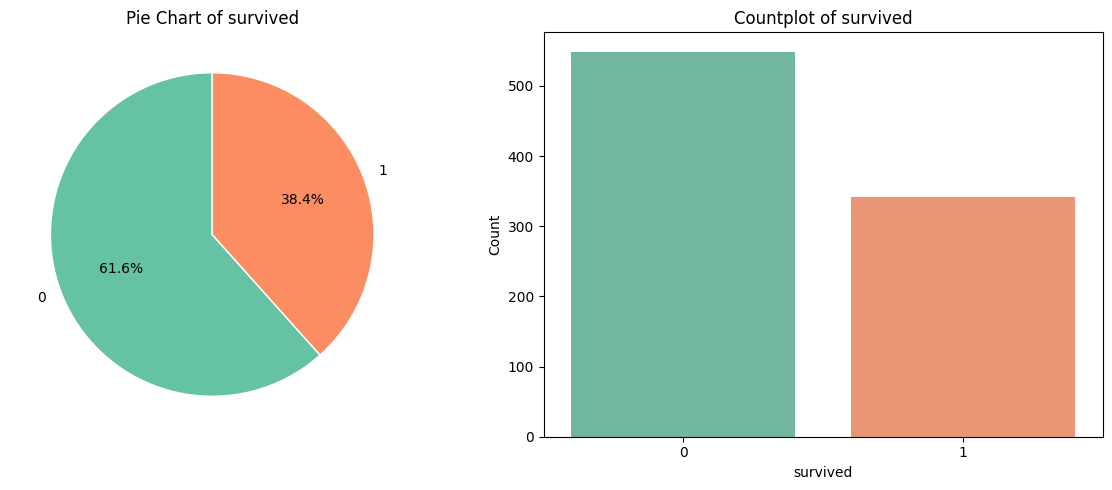

In [23]:
plot_pie_and_countplot(data,"survived", figsize=(12, 5), palette='Set2')

In [24]:
data.groupby(["sex"])['survived'].count()

sex
female    314
male      577
Name: survived, dtype: int64

In [25]:
data.groupby(['survived','sex']).count()

pclass  age  sibsp  parch  fare  embarked  class  who  \
survived sex                                                             
0        female      81   64     81     81    81        81     81   81   
         male       468  360    468    468   468       468    468  468   
1        female     233  197    233    233   233       231    233  233   
         male       109   93    109    109   109       109    109  109   

                 adult_male  deck  embark_town  alive  alone  
survived sex                                                  
0        female          81     6           81     81     81  
         male           468    61          468    468    468  
1        female         233    91          231    233    233  
         male           109    45          109    109    109

In [26]:
data.groupby(['survived','sex'])[['survived']].count()

survived
survived sex             
0        female        81
         male         468
1        female       233
         male         109

Text(0.5, 1.0, 'Survived Based on sex')

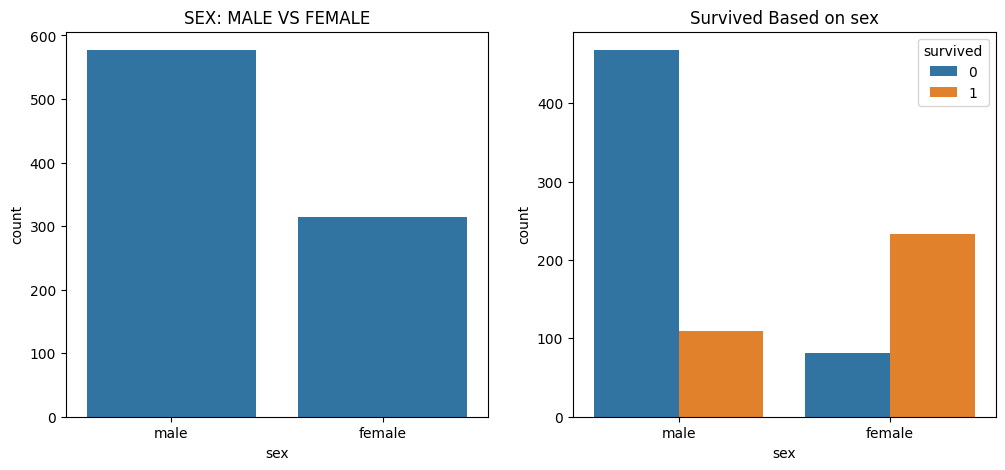

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='sex',data=data, ax=axes[0])
axes[0].set_title("SEX: MALE VS FEMALE")

sns.countplot(x='sex', hue='survived', data = data, ax=axes[1])
axes[1].set_title("Survived Based on sex")

In [28]:
pd.crosstab(data.pclass, data.survived)

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


In [29]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [30]:
#death and alive based on class
pd.crosstab(data.pclass, data.sex)

sex,female,male
pclass,,
1,94,122
2,76,108
3,144,347


In [31]:
#death and alive based on Embarkment
pd.crosstab(data.embarked, data.survived)

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,217


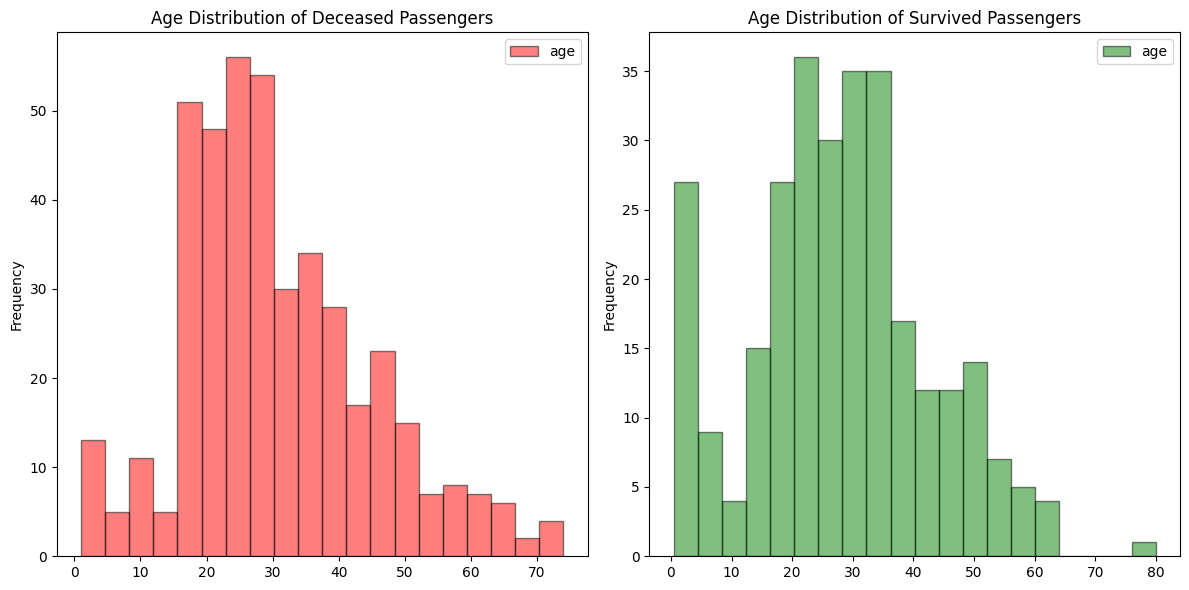

In [32]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

data[data['survived']==0].plot.hist(ax=ax[0],y='age',bins=20,color='red',alpha=0.5,edgecolor='black')
data[data['survived']==1].plot.hist(ax=ax[1],y='age',bins=20,color='green',alpha=0.5,edgecolor='black')
ax[0].set_title('Age Distribution of Deceased Passengers')
ax[1].set_title('Age Distribution of Survived Passengers')
plt.tight_layout()

In [33]:
data['age_group']=0

data.loc[data['age']<=16,'age_group']='Child'
data.loc[(data['age']>16) & (data['age']<=32),'age_group']='young'
data.loc[(data['age']>32) & (data['age']<=48),'age_group']='middle'
data.loc[(data['age']>48) & (data['age']<=64),'age_group']='old'
data.loc[data['age']>64,'age_group']='upper old'

data['age_group'].value_counts().to_frame()

,count
age_group,
young,346
middle,188
0,177
Child,100
old,69
upper old,11


In [34]:
data.groupby(['age_group'])['survived'].sum()

age_group
0             52
Child         55
middle        76
old           30
upper old      1
young        128
Name: survived, dtype: int64

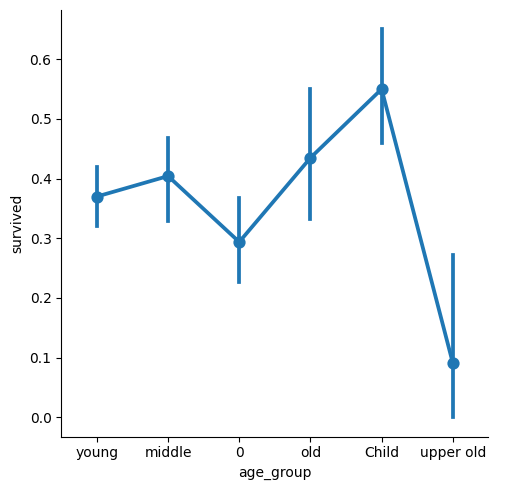

In [35]:
sns.catplot(x='age_group', y='survived', data=data, kind='point')

Text(0.5, 1.0, 'Survival Count by Age Group')

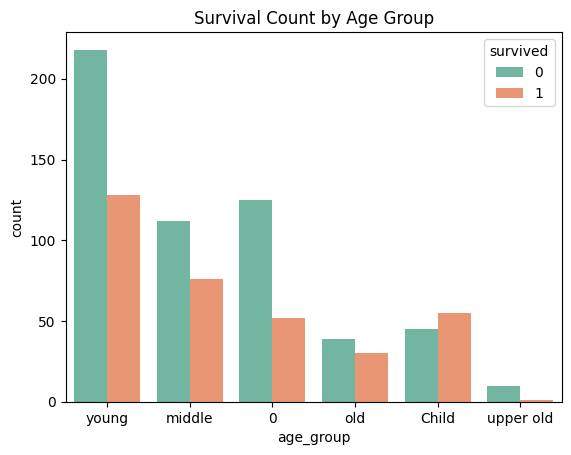

In [36]:
sns.countplot(x='age_group', hue='survived', data=data, palette='Set2')
plt.title('Survival Count by Age Group')

In [37]:
pd.crosstab(data.pclass, data.age_group)

age_group,0,Child,middle,old,upper old,young
pclass,,,,,,
1,30,9,69,43,6,59
2,11,21,49,17,2,84
3,136,70,70,9,3,203


<Axes: xlabel='pclass', ylabel='age'>

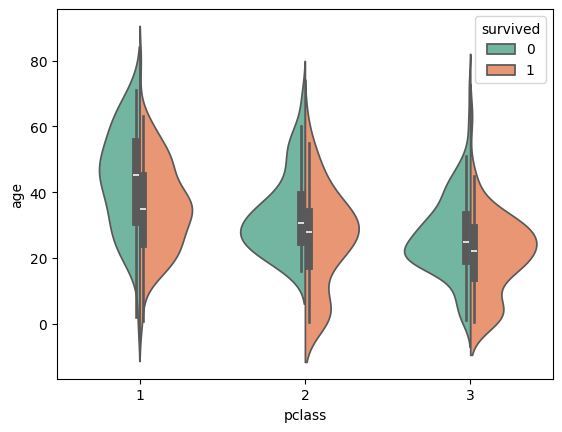

In [40]:
sns.violinplot(x='pclass',y='age',data=data, hue='survived', split=True, palette='Set2')

In [41]:
data['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [42]:
data.groupby(['embarked'])['survived'].sum()

embarked
C     93
Q     30
S    217
Name: survived, dtype: int64

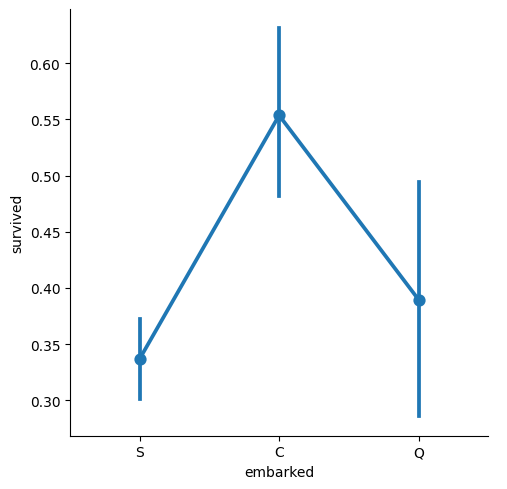

In [44]:
sns.catplot(x='embarked', y='survived', data=data, kind='point')

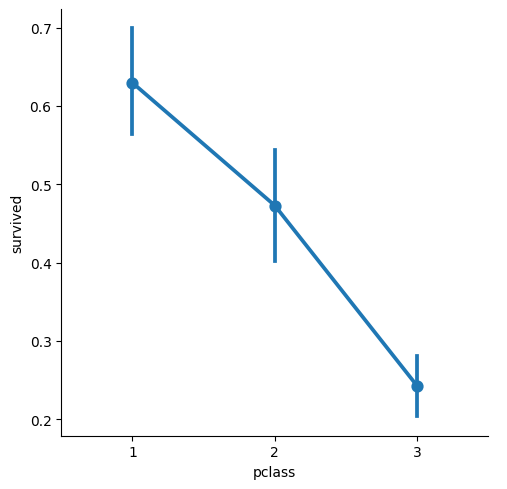

In [48]:
sns.catplot(x='pclass',y='survived', data=data, kind='point')

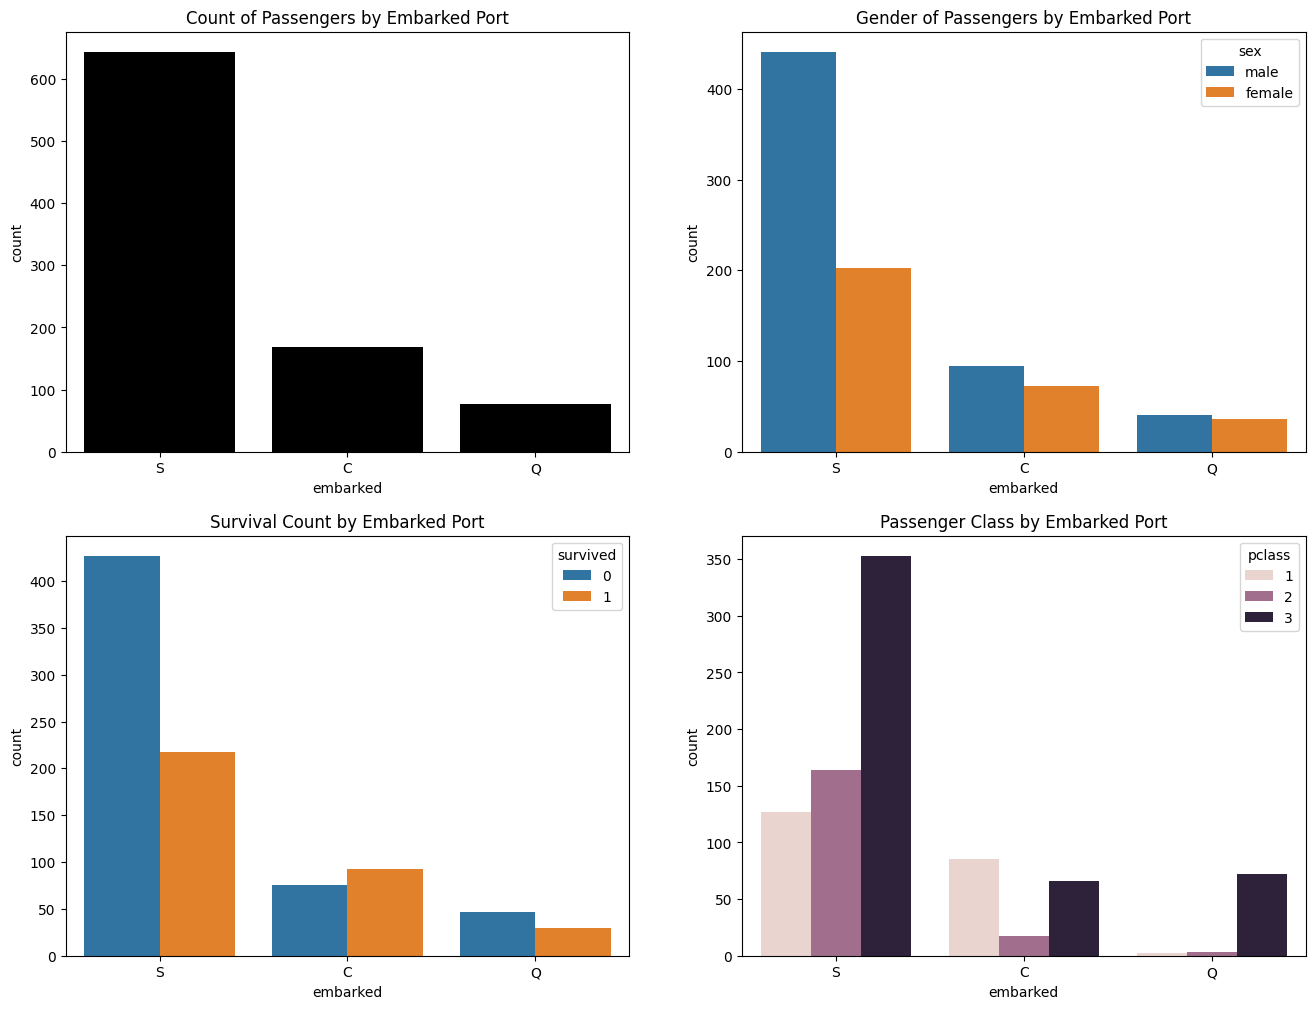

In [58]:
fig, ax = plt.subplots(2,2, figsize=(16,12))

sns.countplot(x='embarked', data=data,color='black', ax=ax[0,0])
ax[0,0].set_title('Count of Passengers by Embarked Port')

sns.countplot(x='embarked',hue='sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Gender of Passengers by Embarked Port')

sns.countplot(x='embarked',hue='survived',data=data , ax=ax[1,0])
ax[1,0].set_title('Survival Count by Embarked Port')

sns.countplot(x='embarked',hue='pclass',data=data, ax=ax[1,1])
ax[1,1].set_title('Passenger Class by Embarked Port')

plt.show()


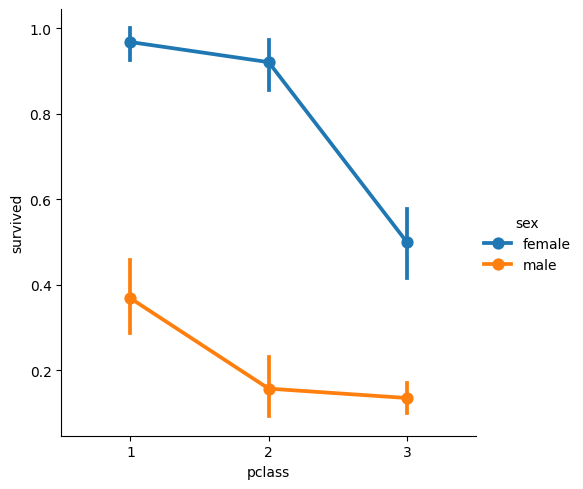

In [60]:
sns.catplot(x='pclass', y='survived',hue='sex', data=data, kind='point')